# Systems of ODEs
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [1]:
import numpy as np
from numpy import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from odeintegrate import *
from scipy.integrate import odeint

# Kinetics Example
Solve the system of ODEs:
\begin{equation}
\frac{\text{d}A}{\text{d}t} = -k_1 A + k_3 B C \\
\frac{\text{d}B}{\text{d}t} = k_1 A  - k_2 B^2 - k_3 B C \\
\frac{\text{d}C}{\text{d}t} = k_2 B^2
\end{equation}

In [2]:
def forward_euler_system(rhsvec, f0vec, tend, dt):
    '''
    Solves a system of ODEs using the Forward Euler method
    '''
    nsteps = int(tend/dt)
    neqs = len(f0vec)
    f = np.zeros( (neqs, nsteps) )
    f[:,0] = f0vec
    time = np.linspace(0,tend,nsteps)
    for n in np.arange(nsteps-1):
        t = time[n]
        f[:,n+1] = f[:,n] + dt * rhsvec(f[:,n], t)
    return time, f


In [3]:
def rhs_kinetics(f,t):
    A = f[0]
    B = f[1]
    C = f[2]
    k1 = 0.04
    k2 = 3e7
    k3 = 1e4
    rhs1 = - k1*A + k3*B*C
    rhs2 = k1*A - k2*B*B - k3*B*C
    rhs3  = k2*B*B
    return np.array([rhs1,rhs2,rhs3])

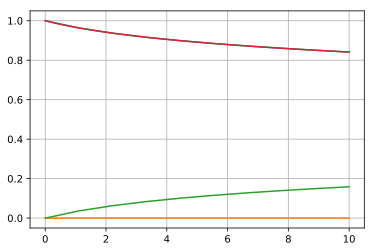

In [4]:
import time
tic = time.clock()
toc = time.clock()
toc - tic
tend = 10
dt = 1e-5
t = np.linspace(0,10,10)
y0 = np.array([1,0,0])
sol = odeint(rhs_kinetics,y0,t) # use odeint
timefe, solfe = forward_euler_system(rhs_kinetics,y0,tend,dt)
plt.plot(t,sol[:,0],t,sol[:,1],t,sol[:,2],timefe,solfe[0])
plt.grid()